In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from statsmodels.formula.api import ols # For n-way ANOVA
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [2]:
df_Diamond=pd.read_csv(r"C:\Users\sruth\Downloads\cubic_zirconia.csv")

In [3]:
df_Diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df_Diamond.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [5]:
df_Diamond.shape

(26967, 11)

In [6]:
df_Diamond=df_Diamond.drop('Unnamed: 0', axis=1)

In [7]:
df_Diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
df_Diamond.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [9]:
df_Diamond.shape

(26967, 10)

In [10]:
df_Diamond.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [11]:
df_Diamond.describe(include='object').T

,count,unique,top,freq
cut,26967,5,Ideal,10816
color,26967,7,G,5661
clarity,26967,8,SI1,6571


In [12]:
df_Diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [13]:
df_Diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [14]:
df_Diamond.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [15]:
df_Diamond.median()

C:\Users\sruth\AppData\Local\Temp\ipykernel_24828\162287070.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_Diamond.median()


carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.71
z           3.52
price    2375.00
dtype: float64

In [16]:
df_Diamond=df_Diamond.fillna(df_Diamond.median())

C:\Users\sruth\AppData\Local\Temp\ipykernel_24828\260315508.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_Diamond=df_Diamond.fillna(df_Diamond.median())


In [17]:
df_Diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [18]:
df_Diamond[df_Diamond['x']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [19]:
#checking for values which are 0

In [20]:
df_Diamond[df_Diamond['x']==0].value_counts().sum()

3

In [21]:
df_Diamond[df_Diamond['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [22]:
df_Diamond[df_Diamond['y']==0].value_counts().sum()

3

In [23]:
df_Diamond[df_Diamond['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [24]:
df_Diamond[df_Diamond['z']==0].value_counts().sum()

9

In [25]:
# Removing all the variables which are equal to 0

In [26]:

df_Diamond= df_Diamond.drop(df_Diamond[df_Diamond['x']==0].index)

In [27]:
df_Diamond=df_Diamond.drop(df_Diamond[df_Diamond['y']==0].index)

In [28]:
df_Diamond=df_Diamond.drop(df_Diamond[df_Diamond['z']==0].index)

In [29]:
# checking for duplicates

In [30]:
df_Diamond.duplicated().sum()

33

In [31]:
#dropping the duplicates

In [32]:
df_Diamond.drop_duplicates(inplace=True)

In [33]:
# rechecking for duplicates

In [34]:
df_Diamond.duplicated().sum()

0

In [35]:
# checking the value count of Categorical variable

In [36]:
print('cut\n',df_Diamond.cut.value_counts())
print('\n')
print('color\n',df_Diamond.color.value_counts())
print('\n')
print('carat\n',df_Diamond.carat.value_counts())

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


carat
 0.30    1328
0.31    1118
1.01    1109
0.70     959
0.32     949
        ... 
1.96       1
1.99       1
2.77       1
2.65       1
3.24       1
Name: carat, Length: 257, dtype: int64


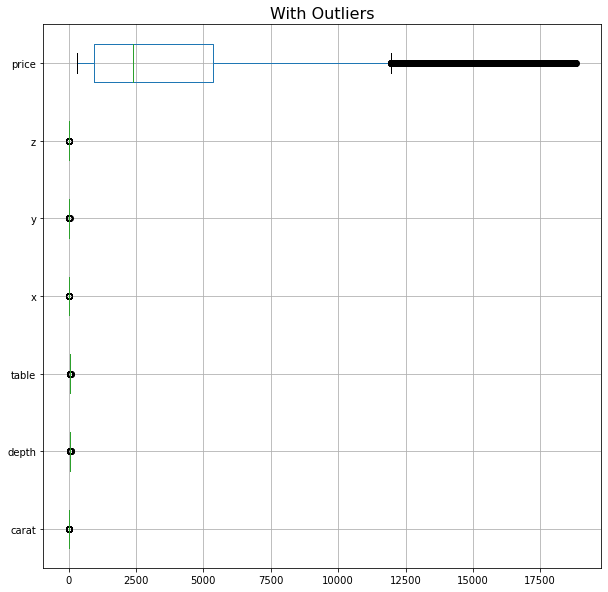

In [37]:
# construct box plot for continuous variables
cont=df_Diamond.dtypes[(df_Diamond.dtypes!='uint8') & (df_Diamond.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_Diamond[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [38]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [41]:
for column in df_Diamond[num].columns:
    lr, ur = remove_outliers(df_Diamond[column])
    df_Diamond[column] = np.where(df_Diamond[column]>ur, ur, df_Diamond[column])
    df_Diamond[column] = np.where(df_Diamond[column]<lr, lr, df_Diamond[column])

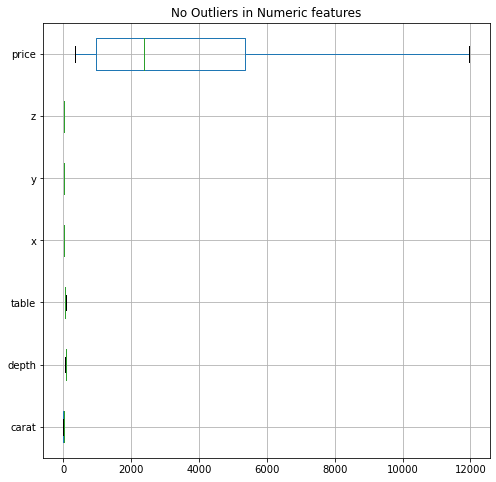

In [42]:
num = df_Diamond.dtypes[df_Diamond.dtypes!='object'].index
plt.figure(figsize=(8,8))
df_Diamond[num].boxplot(vert=0)
plt.title('No Outliers in Numeric features')
plt.show()

In [43]:
df_Diamond[num].skew()

carat    0.917214
depth   -0.194474
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

Text(0.5, 1.0, 'Pair plot for all Numeric features')

<Figure size 3600x2160 with 0 Axes>

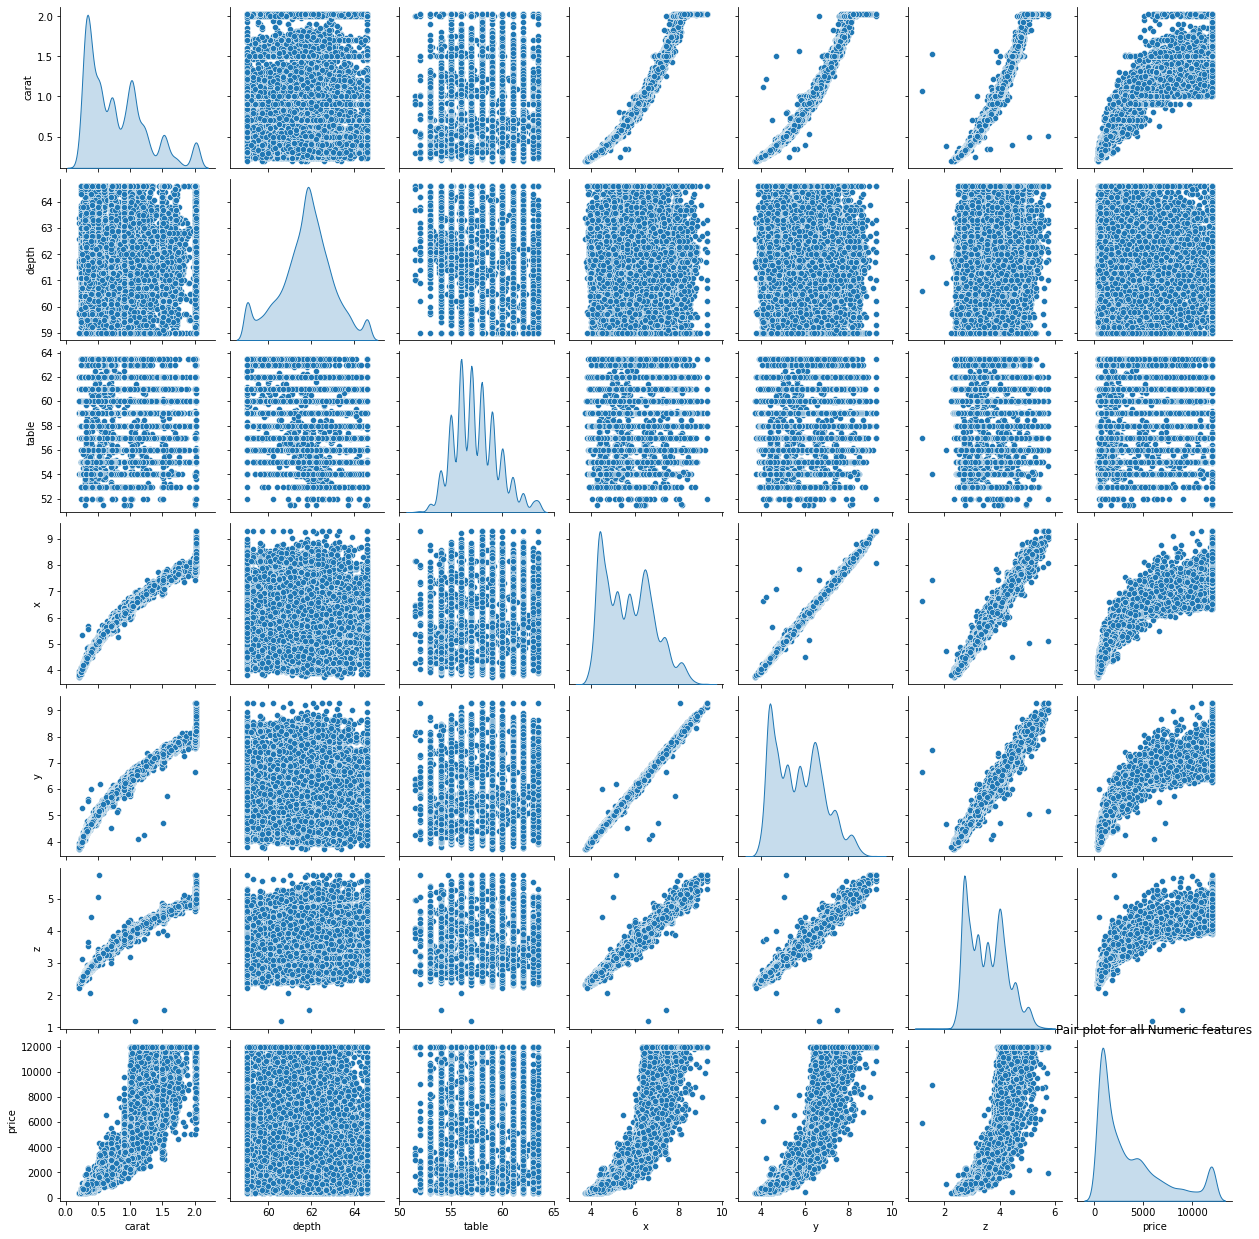

In [44]:
plt.figure(figsize=(50,30))
sns.pairplot(df_Diamond,diag_kind='kde')
plt.title('Pair plot for all Numeric features')

In [45]:
df_Diamond.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.029735,0.187134,0.982880,0.981960,0.980882,0.936765
depth,0.029735,1.000000,-0.289163,-0.019676,-0.022720,0.094916,-0.000845
table,0.187134,-0.289163,1.000000,0.199653,0.194015,0.160519,0.137915
x,0.982880,-0.019676,0.199653,1.000000,0.998489,0.990898,0.913409
y,0.981960,-0.022720,0.194015,0.998489,1.000000,0.990533,0.914838
z,0.980882,0.094916,0.160519,0.990898,0.990533,1.000000,0.908599
price,0.936765,-0.000845,0.137915,0.913409,0.914838,0.908599,1.000000


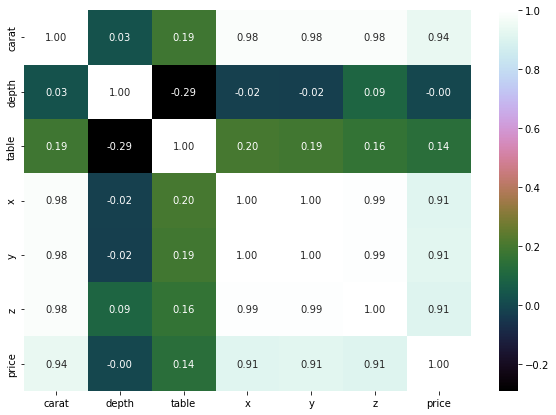

In [46]:
# Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_Diamond.corr(), annot=True, fmt='.2f', cmap='cubehelix')
plt.show()

In [47]:
1.2 #Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

1.2

In [48]:
for colObj in df_Diamond.columns:
    if df_Diamond[colObj].dtype=='object':
        print(colObj.upper(), ':', df_Diamond[colObj].nunique())
        print(df_Diamond[colObj].unique())
        print(df_Diamond[colObj].value_counts().sort_values())
        print('\n')

CUT : 5
['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Fair           779
Good          2434
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR : 7
['E' 'G' 'F' 'D' 'H' 'J' 'I']
J    1440
I    2765
D    3341
H    4091
F    4722
E    4916
G    5650
Name: color, dtype: int64


CLARITY : 8
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




In [49]:
df_Diamond['cut'] = np.where(df_Diamond['cut']=='Fair', 'Good',  df_Diamond['cut'])

In [50]:
for colObj in df_Diamond.columns:
    if df_Diamond[colObj].dtype=='object':
        print(colObj.upper(), ':', df_Diamond[colObj].nunique())
        print(df_Diamond[colObj].unique())
        print(df_Diamond[colObj].value_counts().sort_values())
        print('\n')

CUT : 4
['Ideal' 'Premium' 'Very Good' 'Good']
Good          3213
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR : 7
['E' 'G' 'F' 'D' 'H' 'J' 'I']
J    1440
I    2765
D    3341
H    4091
F    4722
E    4916
G    5650
Name: color, dtype: int64


CLARITY : 8
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




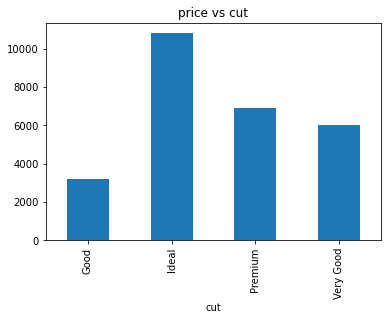

In [51]:
pd.crosstab(df_Diamond['price'],df_Diamond['cut']).sum().plot(kind='bar')
plt.title('price vs cut')
plt.show()

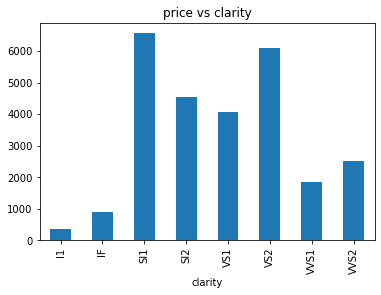

In [52]:
pd.crosstab(df_Diamond['price'],df_Diamond['clarity']).sum().plot(kind='bar')
plt.title('price vs clarity')
plt.show()

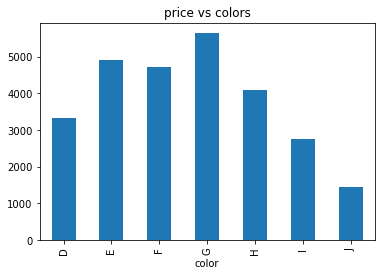

In [53]:
pd.crosstab(df_Diamond['price'],df_Diamond['color']).sum().plot(kind='bar')
plt.title('price vs colors')
plt.show()

# 1.3. Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [54]:
df_Diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


In [55]:
df_Diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

Encoding the Data

In [56]:
for colObj in df_Diamond.columns:
    if df_Diamond[colObj].dtypes=='object':
        df_Diamond[colObj] = pd.Categorical(df_Diamond[colObj]).codes
df_Diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,1,1,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,2,3,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,3,1,7,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,1,2,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,1,2,6,60.4,59.0,4.35,4.43,2.65,779.0


In [57]:
df_Diamond.dtypes

carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

Split the Data

In [58]:
X = df_Diamond.drop('price', axis=1)

y = df_Diamond[['price']]

In [59]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,1,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,2,3,1,60.8,58.0,4.42,4.46,2.70
2,0.90,3,1,7,62.2,60.0,6.04,6.12,3.78
3,0.42,1,2,4,61.6,56.0,4.82,4.80,2.96
4,0.31,1,2,6,60.4,59.0,4.35,4.43,2.65


In [60]:
y.head()

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [62]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [63]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9298.26527939886
The coefficient for cut is 24.627360920857292
The coefficient for color is -227.5556214817504
The coefficient for clarity is 251.15764948175743
The coefficient for depth is -47.09884310763307
The coefficient for table is -75.35278275609559
The coefficient for x is -2064.186774496325
The coefficient for y is 1994.1440990280973
The coefficient for z is -1044.4723530691083


In [64]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7279.434466754383


In [65]:
# R square on training data
regression_model.score(X_train, y_train)

0.9089518992612919

In [66]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9115737236834695

In [67]:
from sklearn import metrics

In [68]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1043.4967867992516

In [69]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1036.3462778148994

Linear Regression using statsmodels(OLS)

In [70]:
import statsmodels.api as sm

In [71]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [72]:
model = sm.OLS(y_train,X_train).fit()
model

In [73]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.089e+04
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:26:45   Log-Likelihood:            -1.5774e+05
No. Observations:               18847   AIC:                         3.155e+05
Df Residuals:                   18837   BIC:                         3.156e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7279.4345    851.088      8.553      0.000    5611.225    8947.644
carat       9298.2653     94.852     98.030      0.000    9112.348    9484.183
cut           24.6274      8.127      3.030      0.002       8.697      40.557
color       -227.5556      4.683    -48.593      0.000    -236.735    -218.377
clarity      251.1576      4.556     55.126      0.000     242.227     260.088
depth        -47.0988     12.452     -3.782      0.000     -71.507     -22.691
table        -75.3528      3.863    -19.506      0.000     -82.925     -67.781
x          -2064.1868    154.945    -13.322      0.000   -2367.892   -1760.481
y           1994.1441    152.398     13.085      0.000    1695.431    2292.858
z          -1044.4724    160.024     -6.527      0.000   -1358.133    -730.812
==============================================================================
Omnibus:                     5004.683   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25441.443
Skew:                           1.192   Prob(JB):                         0.00
Kurtosis:                       8.169   Cond. No.                     9.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
#Calculate MSE on train
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)

In [75]:
np.sqrt(mse) #RMSE on train

1043.4967867992516

In [76]:
# Prediction on Test data
y_pred = model.predict(X_test)

In [77]:
#Calculate MSE on test
mse=metrics.mean_squared_error(y_test,y_pred)
np.sqrt(mse) #RMSE on test

1036.3462778148996

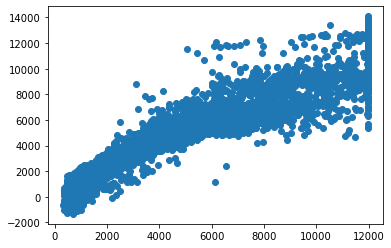

In [78]:
plt.scatter(y_test, y_pred)
plt.show()

In [79]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(7279.43) * const + (9298.27) * carat + (24.63) * cut + (-227.56) * color + (251.16) * clarity + (-47.1) * depth + (-75.35) * table + (-2064.19) * x + (1994.14) * y + (-1044.47) * z + 